In [2]:
import cv2
import numpy as np

img = np.zeros((120, 120), dtype = np.ushort) # 120*120 2차원 배열 생성, 흑백이미지, (unsigned short, 8byte이어야 함)

# 숫자 높을 수록 백색에 가까워짐

img[25:35, :] = 45
img[55:65, :] = 115
img[:, 35:45] = 205
img[:, 75:85] = 255

cv2.imshow('Gray', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

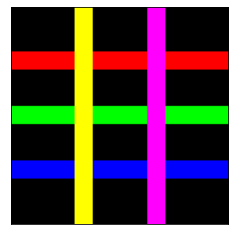

In [5]:
import matplotlib.pyplot as plt
img = np.zeros((120, 120, 3), dtype = np.ushort) # 2차원 이미지, 3채널 컬러 이미지
# 차례대로 [B,G,R]
img[25:35, :] = [255, 0, 0] # 파란색 할당
img[55:65, :] = [0, 255, 0] # 초록색 할당
img[85:95, :] = [0, 0, 255] # 빨간색 할당
img[:, 35:45] = [255, 255, 0] # 초록 & 파랑 = 노랑색 할당
img[:, 75:85] = [255, 0, 255] # 파랑 & 빨강 = 핑크색 할당

# cv2.imshow('BGR', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(img) # cv2.imshow로 했을 경우에는 err 발생했음
plt.xticks([]) # x축 범례 제거
plt.yticks([]) # y축 범례 제거
plt.show()

# 이미지 프로세싱 기초
- 관심영역(Region Of Interest, ROI)
    - 관심영역 지정

In [8]:
# 전체 이미지가 img라는 변수에 있을 때, 관심있는 영역의 좌표가 (x, y)이고 영역의 폭이 w, 높이가 h라고 했을 때
# ROI = img[y:y+h, x:x+w] 

In [3]:
import cv2
import numpy as np

img = cv2.imread('./IMG/donboori.jpg')

x=320; y=150; w=50; h=50;

roi = img[y:y+h, x:x+w] # 행렬 기준이라서 x, y 반대로!

print(roi.shape)
cv2.rectangle(roi, (0, 0), (h-1, w-1), (0, 255, 0))
cv2.imshow("img", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


In [4]:
img2 = roi.copy() # roi 배열 복제
img[y:y+h, x+w:x+w+w] = roi
cv2.rectangle(img, (x, y), (x+w+w, y+h), (0, 255, 0))
cv2.imshow("img", img)
cv2.imshow("roi", img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
isDragging = False
x0, y0, w, h = -1, -1, -1, -1
blue, red = (255,0,0), (0,0,255)

def onMouse(event, x, y, flags, param):
    global isDragging, x0, y0, img
    
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        x0 = x
        y0 = y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw = img.copy()
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # last param = thickness
            cv2.imshow('img', img_draw)
    
    elif event == cv2.EVENT_LBUTTONUP:
        if isDragging:
            isDragging = False
            w = x - x0
            h = y - y0
            print(f'x:{x0}, y:{y0}, w:{w}, h:{h}')
            
            if w > 0 and h > 0:
                img_draw = img.copy()
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2)
                cv2.imshow('img', img_draw)
                roi = img[y0:y0+h, x0:x0+w]
                cv2.imshow('cropped', roi)
                cv2.moveWindow('cropped', 0, 0)
                cv2.imwrite('./IMG/cropped.jpg', roi)
                print('cropped..')
            else:
                # 드래그 잘못된 방향으로 됐을 때
                cv2.imshow('img', img)
                print("좌측 상단에서 우측 하단으로 영역을 드래그하세요.")
                
img = cv2.imread('./IMG/donboori.jpg')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

x:582, y:84, w:279, h:200
cropped..


In [2]:
import cv2
import numpy as np

img = cv2.imread('./IMG/donboori.jpg')
img2 = img.astype(np.uint16)
b, g, r = cv2.split(img2) # color channel별로 분리
gray1 = ((b + g + r)/3).astype(np.uint8) # 평균값 연산 후 dtype 변경

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

: 

# 스레시홀딩
- 여러 점수를 커트라인을 기준으로 합격과 불합격으로 나누는 것처럼 여러 값을 경계점을 기준으로 두 가지 부류로 나누는 것으로, 바이너리 이미지를 만드는 가장 대표적인 방법.

127.0


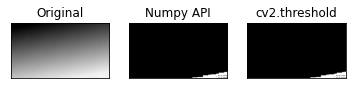

In [3]:
# 전역 스레시홀딩
import cv2
import numpy as np
import matplotlib.pyplot as plt

# IMG를 GRAYSCALE로 읽기
img = cv2.imread('./IMG/gray_gredient.jpg', cv2.IMREAD_GRAYSCALE)

thresh_np = np.zeros_like(img)
# 팬시 인덱싱 활용 / 127 값이 넘는 곳은 모두 255로 초기화
thresh_np[ img > 127 ] = 255 

ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

#params: 차례대로 변환할 이미지 / 경계 값 / 경계 값 기준 만족하는 픽셀에 적용할 값 / 스레시홀드 적용 방법 지정

print(ret) # 바이너리 이미지에 사용된 경계값 반환

imgs = {'Original': img, 'Numpy API': thresh_np, 'cv2.threshold': thresh_cv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

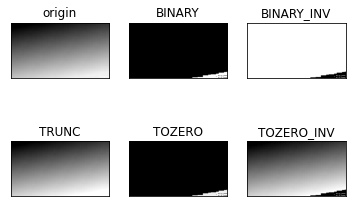

In [5]:
# 스레시홀딩 플래그 실습

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV) 
_, t_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC) 
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO) 
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {
    'origin': img,
    'BINARY': t_bin,
    'BINARY_INV': t_bininv,
    'TRUNC': t_trunc,
    'TOZERO': t_2zr,
    'TOZERO_INV': t_2zrinv
}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

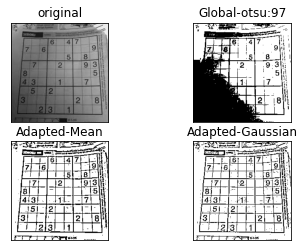

In [3]:
# 적응형 스레시홀드

import cv2, numpy as np
import matplotlib.pyplot as plt

blk_size = 9
C = 5 # 차감 상수

img = cv2.imread('./IMG/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU )
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)

imgs = {
    'original': img, 
    'Global-otsu:%d'%ret: th1,
    'Adapted-Mean': th2,
    'Adapted-Gaussian': th3 # 가우시안 분포는 평균 값보다 선명함은 떨어지지만 노이즈는 훨씬 적음!
}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

# 이미지 연산
- Numpy의 브로드캐스팅 연산
- Opencv에서 제공하는 네 가지 함수 사용

In [1]:
import cv2
import numpy as np

a = np.uint8([[200, 50]])
b = np.uint8([[100, 100]])

add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

#openCV 내장함수의 결과는 반드시 최소 0, 최대 255 사이에서만 값을 가짐
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a, 2)
div2 = cv2.divide(a, 3)

print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [2]:
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)

mask = np.array([[1, 0]], dtype=np.uint8) # mask의 두 번째 요소의 값이 0이므로 2+20의 연산은 이뤄지지 않음

c1 = cv2.add(a, b, None, mask)
print(c1)
c2 = cv2.add(a, b, b, mask) # a와 b를 더한 것을 b에 할당 / b와 c2 모두 같은 값을 할당받은 상태!
print(c2)

[[11  0]]
[[11 20]]


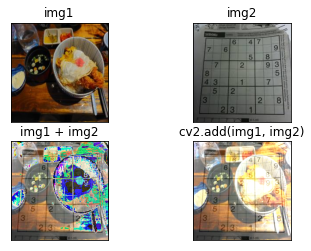

In [7]:
import matplotlib.pyplot as plt

img1 = cv2.imread('./IMG/donboori_2.jpg')
img2 = cv2.imread('./IMG/sudoku.jpg')

img3 = img1 + img2
img4 = cv2.add(img1, img2)

imgs = {
    'img1': img1,
    'img2': img2,
    'img1 + img2': img3, # 이상한 색을 띠고 있는 부분이 바로 255를 초과한 영역!
    'cv2.add(img1, img2)': img4 
}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])

plt.show()

- 두 영상을 합성하려면 각 픽셀의 합이 255가 되지 않도록 각각의 영상에 가중치를 줘서 계산해야 한다.
- 각 영상에 적용할 가중치 : Alpha 
- Alpha값을 조정해서 배분하는 방식
- g(x) = (1-alpha)*f0(x) + alpha*f1(x)
- 합성 = (동   일)*이미지1 + (동   일)*이미지2

# cv2.addWeight()
- cv2.addWeight(img1, alpha, img2, beta=(1-alpha), gamma)
- gamma = 연산 결과에 가감할 상수 / 주로 0 사용

In [8]:
alpha = 0.5

blended = img1 * alpha + img2 *(1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생 제거하기 위함
cv2.imshow('img1 * alpha + img2 *(1-alpha)', blended)

dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted', dst)

# 2가지 방식 모두 결과 면에서 차이 없음!

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
win_name = 'Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
    cv2.imshow(win_name, dst)
    
cv2.imshow(win_name, img1) # 처음에는 img1 그대로 출력된 상태로 set
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

# 비트와이즈 연산
- 각 픽셀에 대한 비트단위 연산
- 두 영상을 합성할 때 특정 영역만 선택하거나 특정 영역만 제외하는 등의 선별적인 연산에 도움이 됨
- True를 255, False를 0으로 생각하면 편함

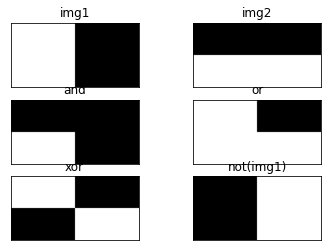

In [10]:
img1 = np.zeros( (200, 400), dtype=np.uint8)
img2 = np.zeros( (200, 400), dtype=np.uint8)
img1[:,:200] = 255
img2[100:200, :] = 255

bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

imgs = {
    'img1': img1,
    'img2': img2,
    'and': bitAnd,
    'or': bitOr,
    'xor': bitXor,
    'not(img1)': bitNot
}

for i, (k,v) in enumerate(imgs.items()):
    plt.subplot(3, 2, i+1)
    plt.title(k)
    plt.imshow(v, 'gray')
    plt.xticks([]); plt.yticks([])
    
plt.show()

In [11]:
img = cv2.imread('./IMG/donboori_2.jpg')

mask = np.zeros_like(img)
cv2.circle(mask, (100, 50), 25, (255, 255, 255), -1) # 두께 = -1 > 색 채우기

masked = cv2.bitwise_and(img, mask)

cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

# 차영상
- 영상간 차이를 알아낼 수 있음

In [ ]:
# cv2.absdiff(img1, img2) -> 절댓값 반환

# 참고로 cv2.bitwise_xor()로도 서로 다른 부분 catch할 수 있음

# 색상으로 마스킹

- dst = cv2.inRange(img, from, to)
- img : 입력 영상
- from : 범위의 시작 배열
- to : 범위의 끝 배열
- dst : img가 from-to에 포함되면 255, 아니면 0을 픽셀 값으로 하는 배열

In [14]:
# 크로마 키 마스킹과 합성

img1 = cv2.imread('./IMG/chroma_man_2.jpg')
img2 = cv2.imread('./IMG/gray_gredient.jpg')

h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

# ROI 선택을 위한 좌표 계산(가운데에 위치하기 위한)
x = (w2 - w1)//2
y = h2 - h1
w = x + w1
h = y + h1

chromakey = img1[:10, :10, :] # 크로마키가 있을 법한 영역을 10픽셀 정도로 set
offset = 20

hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

chroma_h = hsv_chroma[:, :, 0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

mask = cv2.inRange(hsv_img, lower, upper) # 크로마키인 부분이 하얀색으로 됨
mask_inv = cv2.bitwise_not(mask) # 크로마키 제외한 부분이 하얀색으로 됨
roi = img2[y:h, x:w]

fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask) # 크로마키 부분에 배경 삽입됨
img2[y:h, x:w] = fg + bg

cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

# 히스토그램을 활용한 영상분석

(256, 1)
50398.0 (226, 223)


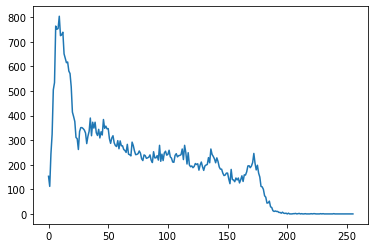

: 

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_gray = cv2.imread('./IMG/donboori_2.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img_gray', img_gray)

hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
# 차례대로 입력 영상 / 채널 / 마스크 / 계급의 개수 / 각 픽셀이 가질 수 있는 값의 범위 ( 위 경우는 RGB에 해당함 )
plt.plot(hist)

print(hist.shape)
print(hist.sum(), img_gray.shape) # 이미지의 폭과 높이의 곱 = 히스토그램의 합
plt.show()


(256, 1)
50398.0 (226, 223, 3)


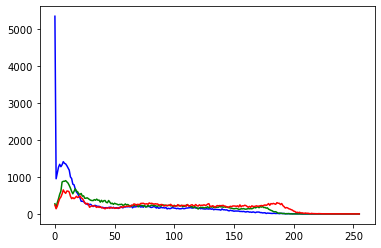

: 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_rgb = cv2.imread('./IMG/donboori_2.jpg')
cv2.imshow('img_rgb', img_rgb)

channels = cv2.split(img_rgb)
colors = ('b', 'g', 'r')
for (ch, color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)

print(hist.shape)
print(hist.sum(), img_rgb.shape) # 이미지의 폭과 높이의 곱 = 히스토그램의 합
plt.show()

# 정규화(Normalize)

- 원래 기준이 서로 다른 값을 같은 기준이 되게 만드는 것을 말함.
- 주로 픽셀 값들이 골고루 분포하지 않고 특정 영역에 몰려있을 때 화질을 개선할 경우에 사용
- 주로 영상 간의 연산을 해야 하는데, 서로 조건이 다른 경우에 사용

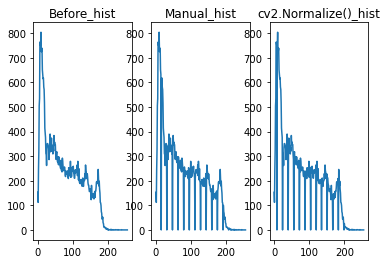

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./IMG/donboori_2.jpg', cv2.IMREAD_GRAYSCALE)

# 직접 normalize
img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * (255) / (img_f.max() - img_f.min()))
img_norm = img_norm.astype(np.uint8)

img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX) # NORM_MINMAX => alpha - beta 구간으로 정규화

hist = cv2.calcHist([img], [0], None, [256], [0,255])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0, 255])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0, 255])

imgs = {
    'Before': img,
    'Manual': img_norm,
    'cv2.Normalize()': img_norm2
}

hists = {
    'Before_hist': hist,
    'Manual_hist': hist_norm,
    'cv2.Normalize()_hist': hist_norm2
}
    
for j, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,j+1)
    plt.title(k)
    plt.plot(v)

plt.show()

# 이퀄라이즈(평탄화)
- 노멀라이즈는 분포가 한곳에 집중되어 있는 경우에는 효과적이지만, 그 집중된 영역에서 멀리 떨어진 값이 있을 경우에는 효과가 없다.
- 히스토그램으로 빈도를 구해서 그것을 노멀라이즈 한 뒤 누적값을 전체 개수로 나누어 나온 결과 값을 히스토그램 원래 픽셀 값에 매핑

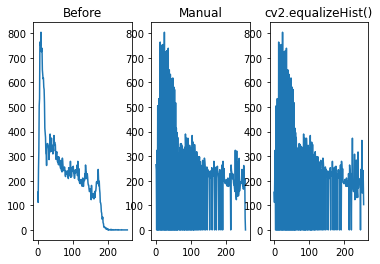

: 

In [10]:
img = cv2.imread('./IMG/donboori_2.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape[:2]

# 히스토그램 이퀄라이즈 수식을 그대로 연산에 적용
hist = cv2.calcHist([img], [0], None, [256], [0,256])
cdf = hist.cumsum() # 누적 히스토그램
cdf_m = np.ma.masked_equal(cdf, 0) # 0인 값을 NaN으로 제거, 불필요한 연산을 줄이기 위해서
cdf_m = (cdf_m - cdf_m.min()) / (rows * cols) * 255 # 이퀄라이즈 하스토그램 계산
cdf = np.ma.filled(cdf_m, 0).astype('uint8') # NaN을 다시 0으로 환원
img2 = cdf[img] # 히스토그램을 픽셀로 매칭, 연산 결과를 원래의 픽셀 값에 매핑

img3 = cv2.equalizeHist(img) # openCV로 이퀄라이즈 히스토그램 적용

hist2 = cv2.calcHist([img2], [0], None, [256], [0,256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0,256])

cv2.imshow('Before', img)
cv2.imshow('Manual', img2)
cv2.imshow('cv2.equalizeHist()', img3)
hists = {
    'Before': hist,
    'Manual': hist2,
    'cv2.equalizeHist()': hist3
}

for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1, 3, i+1)
    plt.title(k)
    plt.plot(v)
    
plt.show()

# CLAHE(Contrast Limiting Adaptive Histogram Equlization)
- 영상 전체에 이퀄라이즈를 적용했을 때 너무 밝은 부분이 날아가는 현상을 막기 위해 영상을 일정한 영역으로 나눠서 이퀄라이즈를 적용하는 것
- 노이즈가 증폭되는 것을 막기 위해 어느 히스토그램 계급이든 지정된 제한 값을 넘으면 그 픽셀은 다른 계급으로 배분하고 나서 이퀄라이즈를 적용함.

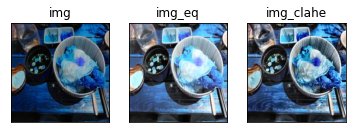

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./IMG/donboori_2.jpg')
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_eq = img_yuv.copy()
img_eq[:, :, 0] = cv2.equalizeHist(img_eq[:, :, 0])
img_eq = cv2.cvtColor(img_eq, cv2.COLOR_YUV2BGR)

img_clahe = img_yuv.copy()
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
img_clahe[:, :, 0] = clahe.apply(img_clahe[:, :, 0])
img_clahe = cv2.cvtColor(img_clahe, cv2.COLOR_YUV2BGR)

imgs = {
    'img': img,
    'img_eq': img_eq,
    'img_clahe': img_clahe
}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(1,3, i+1)
    plt.title(k)
    plt.imshow(v)
    plt.xticks([]); plt.yticks([])

plt.show()

# 2D 히스토그램

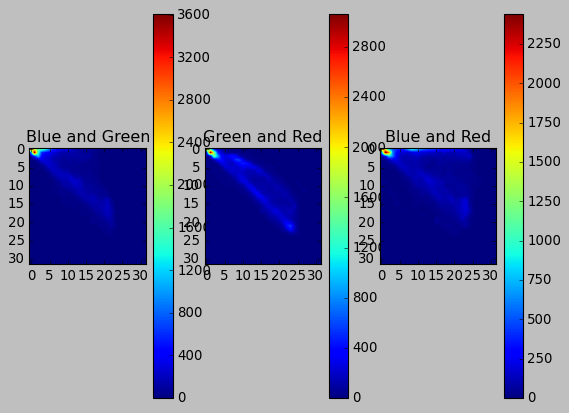

In [2]:
plt.style.use('classic')
img = cv2.imread('./IMG/donboori_2.jpg')

plt.subplot(131)
hist = cv2.calcHist([img], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Blue and Green')
plt.colorbar(p)

plt.subplot(132)
hist = cv2.calcHist([img], [1, 2], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Green and Red')
plt.colorbar(p)

plt.subplot(133)
hist = cv2.calcHist([img], [0, 2], None, [32, 32], [0, 256, 0, 256])
p = plt.imshow(hist)
plt.title('Blue and Red')
plt.colorbar(p)

plt.show()

# 역투영

- 2차원 히스토그램과 HSV 컬러 스페이스를 이용하면 색상으로 특정 물체나 사물의 일부분을 배경에서 분리할 수 있다.
- 관심영역의 H와 V값의 분포를 얻어낸 후 전체 영상에서 해당 분포의 픽셀만 찾아내는 것

In [4]:
# win_name = 'back_projection'
# img = cv2.imread('./IMG/chroma_man_2.jpg')
# hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# draw = img.copy()

# # 역투영된 결과 마스킹 후 결과 출력하는 함수

# def masking(bp, win_name):
#     disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
#     cv2.filter2D(bp, -1, bp)
#     _, mask = cv2.threshold(bp, 1, 255, cv2.THRESH_BINARY)
#     result = cv2.bitwise_and(img, img, mask = mask)
#     cv2.imshow(win_name, result)
    
# def backProject_manual(hist_roi):
    

# 히스토그램 비교

CORREL    	img1:   1.00	img2:   0.06	img3:   0.31	img4:   0.15	
CHISQR    	img1:   0.00	img2: 331.36	img3: 155.64	img4: 138.42	
INTERSECT 	img1:   1.00	img2:   0.06	img3:   0.14	img4:   0.02	
BHATTACHARYYA	img1:   0.00	img2:   0.81	img3:   0.65	img4:   0.77	


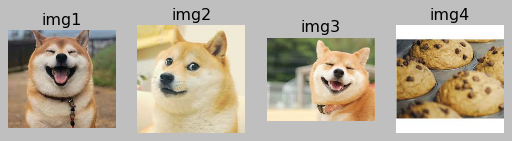

In [5]:
import cv2, numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./IMG/shiba1.jpg')
img2 = cv2.imread('./IMG/shiba2.jpg')
img3 = cv2.imread('./IMG/shiba3.jpg')
img4 = cv2.imread('./IMG/cm.jpg')

cv2.imshow('query', img1)
imgs = [img1, img2, img3, img4]
hists = []
for i, img in enumerate(imgs) :
    plt.subplot(1,len(imgs),i+1)
    plt.title('img%d'% (i+1))
    plt.axis('off') 
    plt.imshow(img[:,:,::-1])
    #---① 각 이미지를 HSV로 변환
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    #---② H,S 채널에 대한 히스토그램 계산
    hist = cv2.calcHist([hsv], [0,1], None, [180,256], [0,180,0, 256])
    #---③ 0~1로 정규화
    cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
    hists.append(hist)


query = hists[0]
methods = {'CORREL' :cv2.HISTCMP_CORREL, 'CHISQR':cv2.HISTCMP_CHISQR, 
           'INTERSECT':cv2.HISTCMP_INTERSECT,
           'BHATTACHARYYA':cv2.HISTCMP_BHATTACHARYYA}
for j, (name, flag) in enumerate(methods.items()):
    print('%-10s'%name, end='\t')
    for i, (hist, img) in enumerate(zip(hists, imgs)):
        #---④ 각 메서드에 따라 img1과 각 이미지의 히스토그램 비교
        ret = cv2.compareHist(query, hist, flag)
        if flag == cv2.HISTCMP_INTERSECT: #교차 분석인 경우 
            ret = ret/np.sum(query)        #비교대상으로 나누어 1로 정규화
        print("img%d:%7.2f"% (i+1 , ret), end='\t')
    print()
plt.show()